# 使用matplotlib和opencv做图像处理

下面介绍一些用`matplotlib`和`opencv`模块组合起来进行图像处理的方法：

首先是要用到的模块：

In [51]:
import cv2 as cv
import matplotlib.pyplot as plt
import numpy as np

下面是我们要使用到的图像文件，著名的莱娜图：

![](lena.jpg)

读取并显示文件：

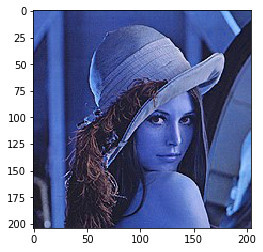

In [44]:
img = cv.imread('lena.jpg')
plt.imshow(img)
plt.show()

以上的结果的十分有趣的：用opencv自带的imread函数读取了图像之后，再用matplotlib显示图像，结果出现了颜色不一致的情况（因为opencv绘制图像的时候会给出一个对话框，比较不方便）。至于为什么会这样，下面需要详细说明：

1. `plt.imshow(X, cmap, ...)`: 在官方文档中可以查阅到，该函数的作用是读取一个 $n\times m$ 或者 $n\times m\times 3$ 或者 $n\times m\times 3$ 的矩阵，然后再输出一个图像。当输入图像是二维矩阵的时候，`cmap`参数是可选的，当输入图像是三维矩阵的时候，`cmap`参数强制作废，输出一张原色图像。具体的`cmap`的可选项为：

    <table>
        <thead>
            <tr>
                <th>颜色图谱</th>
                <th>描述</th>
            </tr>
        </thead>
        <tbody>
            <tr>
                <td>autumn</td>
                <td>红-橙-黄</td>
            </tr>
            <tr>
                <td>bone</td>
                <td>黑-白，x线</td>
            </tr>
            <tr>
                <td>cool</td>
                <td>青-洋红</td>
            </tr>
            <tr>
                <td>copper</td>
                <td>黑-铜</td>
            </tr>
            <tr>
                <td>flag</td>
                <td>红-白-蓝-黑</td>
            </tr>
            <tr>
                <td>gray</td>
                <td>黑-白</td>
            </tr>
            <tr>
                <td>hot</td>
                <td>黑-红-黄-白</td>
            </tr>
            <tr>
                <td>hsv</td>
                <td>hsv颜色空间， 红-黄-绿-青-蓝-洋红-红</td>
            </tr>
            <tr>
                <td>inferno</td>
                <td>黑-红-黄</td>
            </tr>
            <tr>
                <td>jet</td>
                <td>蓝-青-黄-红</td>
            </tr>
            <tr>
                <td>magma</td>
                <td>黑-红-白</td>
            </tr>
            <tr>
                <td>pink</td>
                <td>黑-粉-白</td>
            </tr>
            <tr>
                <td>plasma</td>
                <td>绿-红-黄</td>
            </tr>
            <tr>
                <td>prism</td>
                <td>红-黄-绿-蓝-紫-...-绿模式</td>
            </tr>
            <tr>
                <td>spring</td>
                <td>洋红-黄</td>
            </tr>
            <tr>
                <td>summer</td>
                <td>绿-黄</td>
            </tr>
            <tr>
                <td>viridis</td>
                <td>蓝-绿-黄</td>
            </tr>
            <tr>
                <td>winter</td>
                <td>蓝-绿</td>
            </tr>
        </tbody>
    </table>
2. `opencv`的`imread`和`matplotlib`的`imread`是不一样的，至少在颜色空间上有差异。

为了证明以上两个说法，做如下的实验：

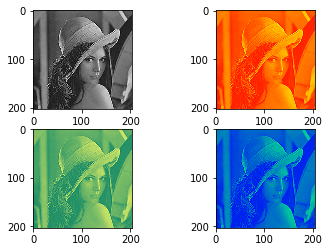

In [42]:
img = cv.imread('lena.jpg', 0) # 读入一张灰度图像
plt.subplot(221)
plt.imshow(img, cmap = 'gray')
plt.subplot(222)
plt.imshow(img, cmap = 'autumn')
plt.subplot(223)
plt.imshow(img, cmap = 'summer')
plt.subplot(224)
plt.imshow(img, cmap = 'winter')
plt.show()

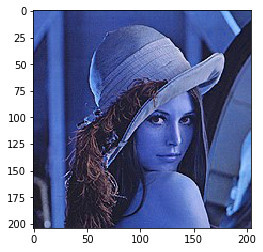

In [43]:
img = cv.imread('lena.jpg') # 读入一张彩色图像
plt.imshow(img, cmap = 'gray') # cmap参数无效
plt.show()

下面，为了验证第二个观点，需要分别使用两个包的`imread`方法：

In [48]:
import matplotlib.image as mimg
img1 = cv.imread('lena.png')
img2 = mimg.imread('lena.png') # matplotlib.image.imread方法不能读取jpg格式的图像
print(img1[0, 0, :])
print(img2[0, 0, :])

[ 71 101 188]
[0.7372549  0.39607844 0.2784314 ]


从上面的结果可以看出，opencv的读取格式是整数，matplotlib的读取格式是浮点数，稍作计算就可以知道：

In [49]:
print([71 / 255, 101 / 255, 188 / 255])

[0.2784313725490196, 0.396078431372549, 0.7372549019607844]


这两种格式是非常容易转换的，在颜色空间中，一个是将三原色分为256份，一个是将该颜色空间均分到 [0, 1] 之间。而显然的，它们的颜色顺序和上面的第二个观点一致。为了能输出正确的图像，需要将每个像素的第一个和第三个元素对调。

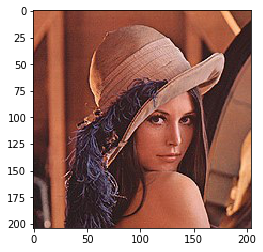

In [59]:
img = cv.imread('lena.jpg')
for row in range(len(img)):
    img[row] = np.matrix(img[row]) * [[0, 0, 1], [0, 1, 0], [1, 0, 0]] # 利用矩阵变换
plt.imshow(img)
plt.show()

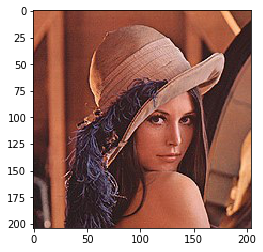

In [50]:
img = cv.imread('lena.jpg')
img = cv.cvtColor(img, cv.COLOR_BGR2RGB) # 转换内部颜色空间
plt.imshow(img)
plt.show()

显然，第二种方法更方便。